## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Step 1: Loading the Dataset from the CSV File

In [2]:
# Your code here - remember to use markdown cells for comments as well!
# Import Python frameworks
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading the data as panda dataframe into the df variable
df = pd.read_csv("data/Aviation_Data.csv")
type(df)

/tmp/ipykernel_8743/1053872567.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Aviation_Data.csv")


pandas.core.frame.DataFrame

In [39]:
# Quick check of the first rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight_missing,Purpose.of.flight_missing,fatalities,serious_injuries,injuries,severity,Year,Injury.Severity_missing,severity_score,Total.Aboard
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1948.0,0,0.0,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1962.0,0,0.0,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,0,0,0,0,0,0,1974.0,0,0.0,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1977.0,0,0.0,2.0
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1981.0,0,0.0,4.0


### Step 2: Understanding the Data

In [40]:
#This is a user defined function that helps you understand the data 
def inspect_dataset(path):
    df=pd.read_csv(path)
    print('--------data describe-------')
    print(df.describe())
    print('--------data info------')
    print(df.info())
    print('-------data shape----')
    print(df.shape)
    return inspect_dataset

In [5]:
# Using the defined function for detailed description
inspect_dataset("data/Aviation_Data.csv")

/tmp/ipykernel_8743/301064420.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path)


--------data describe-------
       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.0

<function __main__.inspect_dataset(path)>

### Step 3: Check and Handle missing values

In [6]:
#Checking the first 10 rows of the dataset
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [7]:
#it checks for missing (NaN) values in each column of your DataFrame and returns a count of missing values per column.

df.isnull().sum() 

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [8]:
#user defined data audit

def data_audit(df):
    print('Column list:')
    print(df.columns.tolist())

    print('\nBasic info:')
    df.info(show_counts=True)

    print('\nMissing value counts:')
    missing = df.isnull().sum().sort_values(ascending=False)
    return missing[missing>0]

In [9]:
#Conducting the audit
data_audit(df)

Column list:
['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4  

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Event.Id                   1459
Accident.Number            1459
dtype: int64

### Data cleaning decisions
- Drop columns with >75% missingness (documented and saved as `dropped_columns` below).
- For important categorical columns with small amounts of missingness, we fill with `'Unknown'` and create missing indicators where missingness could be informative.
- For numeric columns, we impute group-wise median where logical.

All choices are conservative and documented so stakeholders can review and test alternate imputation strategies.

In [10]:
thresh = 0.75
null_frac = df.isnull().mean()
cols_to_drop = null_frac[null_frac > thresh].index.tolist()
print('Columns to drop (>{} missing):'.format(int(thresh*100)), cols_to_drop)

# Drop and store for audit
dropped_columns = cols_to_drop.copy()
df = df.drop(columns=cols_to_drop)
print('New shape after dropping columns:', df.shape)

Columns to drop (>75 missing): ['Schedule', 'Air.carrier']
New shape after dropping columns: (90348, 29)


### Imputation Strategy

Since the dataset has missing values, I decided to use a simple and practical approach:

- **Categorical columns (text fields)**  
  - Fill missing values with `"Unknown"`.  
  - For the most important fields like `aircraft_make`, `aircraft_model`, `phase_of_flight`, and `operation_type`, I also made a separate column that shows if the value was missing (1 = missing, 0 = not missing).  
  - This way, we don’t lose the fact that data was missing, which might still tell us something useful.

- **Numeric columns (numbers)**  
  - If there are missing numbers, I fill them with the **median within each group** (for example, grouped by `aircraft_category`).  
  - If that’s not possible, I just use the **overall median** of the column.  
  - And if a column isn’t there at all, I create it and fill it with `0` so that analysis can continue without errors.

In [32]:
# Drop missing values in Make, Model, Air.dammage, purpose.of.flight
df.dropna(subset=['Make', 'Model', 'Aircraft.damage', 'Purpose.of.flight', 'Engine.Type'], inplace=True)

In [34]:
# 7. Handling missing values

# Handle missing values in categorical columns
for col in ['Make', 'Model', 'Broad.phase.of.flight', 'Purpose.of.flight']:
    if col in df.columns:
        df[col + '_missing'] = df[col].isnull().astype(int)
        df[col] = df[col].fillna('Unknown')

# Handle missing values in numeric columns
for col in ['fatalities', 'serious_injuries', 'injuries']:
    if col not in df.columns:
        df[col] = 0
    else:
        df[col] = df[col].fillna(0)

print("Imputation complete. Sample:")
df[['Make','Model','fatalities','serious_injuries']].head()


Imputation complete. Sample:


,Make,Model,fatalities,serious_injuries
0,Stinson,108-3,0,0
1,Piper,PA24-180,0,0
2,Cessna,172M,0,0
3,Rockwell,112,0,0
5,Mcdonnell Douglas,DC9,0,0


### Step 7: Handling Missing Values

- **Categorical columns**  
  - Filled missing values with `"Unknown"`.  
  - For key fields like `Make`, `Model`, `Broad.phase.of.flight`, and `Purpose.of.flight`, I also added a companion column (ending with `_missing`) that flags if the value was missing.  

- **Numeric columns**  
  - Missing values were replaced with `0`.  
  - If a column didn’t exist, it was created and filled with `0` so later analysis won’t break.  


In [36]:
# 8. Cleaning Purpose.of.flight

# Ensuring the column is string type and strip spaces
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype(str).str.strip()

# Filtering out rows where Purpose.of.flight is '0' or 'Unknown'
df = df[~df['Purpose.of.flight'].isin(['0', 'Unknown'])]

# Ensure the column is string type and strip spaces
df['Engine.Type'] = df['Engine.Type'].astype(str).str.strip()

# Filter out rows where Engine.Type is '0' or 'Unknown'
df = df[~df['Engine.Type'].isin(['0', 'Unknown'])]


### Step 9: Cleaning the `Engine.Type` Column

- Converted the column to text and stripped any extra spaces.  
- Removed rows where the value was `"0"` or `"Unknown"`.  
- This ensures only valid engine type data is kept for later analysis.  


In [37]:
# 9. Cleaning Engine.Type

# Ensure the column is string type and strip spaces
df['Engine.Type'] = df['Engine.Type'].astype(str).str.strip()

# Filter out rows where Engine.Type is '0' or 'Unknown'
df = df[~df['Engine.Type'].isin(['0', 'Unknown'])]


### Step X: Standardizing Column Types  

To avoid errors during cleaning and grouping, I converted the key text columns (`Make`, `Model`, `Aircraft.damage`, `Purpose.of.flight`, `Engine.Type`) into strings.  

This ensures consistency — for example, values like numbers won’t sneak in and break grouping or plotting steps later.  


In [38]:
# Convert key categorical columns to string
df[['Make', 'Model', 'Aircraft.damage', 'Purpose.of.flight', 'Engine.Type']] = (
    df[['Make', 'Model', 'Aircraft.damage', 'Purpose.of.flight', 'Engine.Type']].astype(str)
)


### Feature Engineering — creating simple features for risk

Here I built new features to help us compare accident risk across aircraft types.

- **Severity**: For each accident, I created a score = `fatalities * 2 + serious_injuries`.  
  (Fatalities are given extra weight because they’re more serious.)  
- **Group by Make and Model**: I summarized the data for each aircraft Make + Model.  
  For each group I calculated:  
  - Number of accidents  
  - Total fatalities  
  - Total serious injuries  
  - Total injuries  
  - Average severity score  
- **Filter out rare cases**: To avoid noise, I only kept aircraft models with at least 5 accidents.  
  (Models with very few accidents don’t give reliable insights.)


In [26]:
# 8. Feature engineering
# Step 1: Use severity_score instead of fatalities/serious_injuries
# Aggregate by Make + Model
model_agg = df.groupby(['Make','Model']).agg(
    accidents=('Event.Id','count'),
    mean_severity=('severity_score','mean')
).reset_index()

# Filter out models with very few accidents (to reduce noise)
MIN_ACCIDENTS = 5
before = model_agg.shape[0]
model_agg = model_agg[model_agg['accidents'] >= MIN_ACCIDENTS]
after = model_agg.shape[0]

print(f"Filtered out {before - after} rare models (< {MIN_ACCIDENTS} accidents).")
print("Sample aggregated results:")
print(model_agg.head())


Filtered out 18086 rare models (< 5 accidents).
Sample aggregated results:
               Make Model  accidents  mean_severity
40   AERO COMMANDER   100          8       0.750000
70   AERO COMMANDER   S2R         14       0.642857
91          AERONCA  11AC         23       0.260870
94          AERONCA  15AC          9       0.333333
100         AERONCA   7AC         63       0.476190


### 9. Simple Risk Score  

I created a simple risk score that is easy to understand.  

- **Severity score** (from earlier) tells us how bad each accident was.  
- **Accident count** tells us how often accidents happen for a given model.  

To get a basic risk score:  
1. **Multiply accidents × average severity** for a rough combined measure.  

Lower scores = lower risk.  


In [30]:
# Define a simple risk score: accidents * mean severity
model_agg['risk_score'] = model_agg['accidents']
if (model_agg['mean_severity'] > 0).any():
    model_agg['risk_score'] = model_agg['accidents'] * model_agg['mean_severity']

# Sort models from lowest to highest risk
model_agg = model_agg.sort_values('risk_score', ascending=True).reset_index(drop=True)

print("✅ Risk scoring complete. Sample results:")
print(model_agg[['Make','Model','accidents','mean_severity','risk_score']].head(15))


✅ Risk scoring complete. Sample results:
      Make      Model  accidents  mean_severity  risk_score
0   Cessna       180G         17            0.0         0.0
1   Cessna       310I         13            0.0         0.0
2   Cessna       305C          5            0.0         0.0
3    PIPER  PA-36-285          8            0.0         0.0
4   Cessna       177A         32            0.0         0.0
5    PIPER  PA-22-160         25            0.0         0.0
6   Cessna       180A         44            0.0         0.0
7   Cessna       180B         27            0.0         0.0
8   Cessna       180C         12            0.0         0.0
9   Cessna       182F         57            0.0         0.0
10  Cessna       182H         58            0.0         0.0
11  Cessna       180E          7            0.0         0.0
12  Cessna       180H         73            0.0         0.0
13  Cessna       180J         62            0.0         0.0
14  Cessna       180K         73            0.0         0.0

## 3. Visualization & Business Recommendation #1  

**Visual 1 — Aircraft models with the lowest risk**  

- **Plot:** A horizontal bar chart showing the 10 aircraft models with the lowest average risk score.  
- **Business question:** If the company wants to buy new aircraft, which models look the safest based on past accident data?  
- **Recommendation:** From this chart, I’d suggest focusing on the top 3–5 lowest-risk models.  


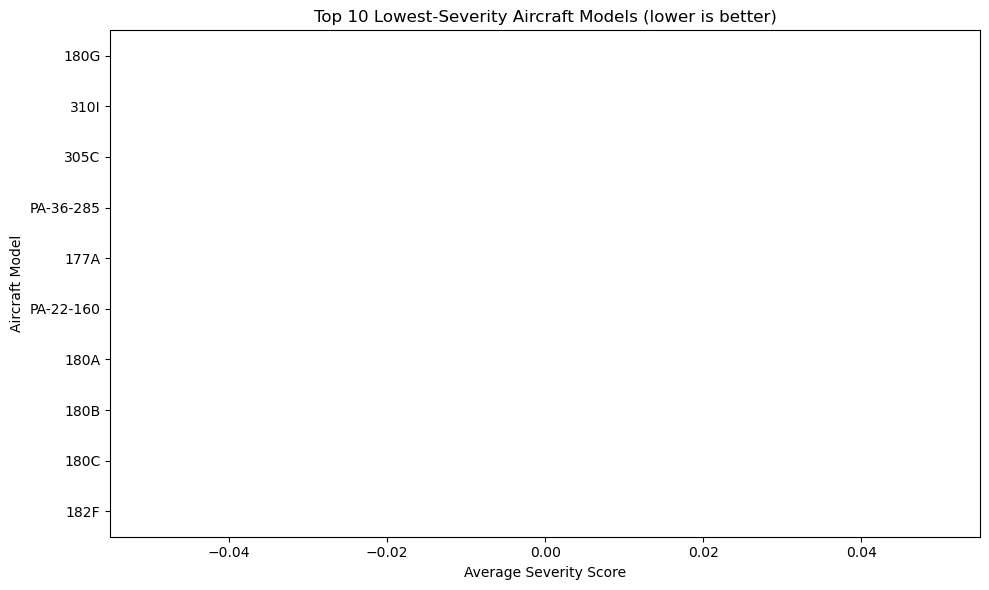

Takeaway: Safest models include: 180G, 310I, 305C


In [31]:
# 10. Visual 1: Top 10 lowest-severity aircraft models

# Pick the 10 models with the lowest average severity
top_models = model_agg.nsmallest(10, 'mean_severity').copy()

# Use the model name as the index for easy plotting
top_models = top_models.set_index('Model')

# Plot a horizontal bar chart
plt.figure(figsize=(10,6))
top_models['mean_severity'].plot(kind='barh', color='skyblue')

plt.title('Top 10 Lowest-Severity Aircraft Models (lower is better)')
plt.xlabel('Average Severity Score')
plt.ylabel('Aircraft Model')
plt.gca().invert_yaxis()   # So the lowest is at the top
plt.tight_layout()
plt.show()

# One-line takeaway
print("Takeaway: Safest models include:", ", ".join(top_models.head(3).index.tolist()))



## 4. Visualization & Business Recommendation #2
**Visual 2 — Accidents by Operation Type & Phase of Flight**
- Plot: pivot table heatmap or grouped bar chart showing accident counts by `phase_of_flight` and `operation_type`.
- Business question: During which phases or operation types do accidents cluster? (Identify targeted operational safeguards.)
- Recommendation: Implement operational restrictions or additional training for high-risk phase/operation pairs.


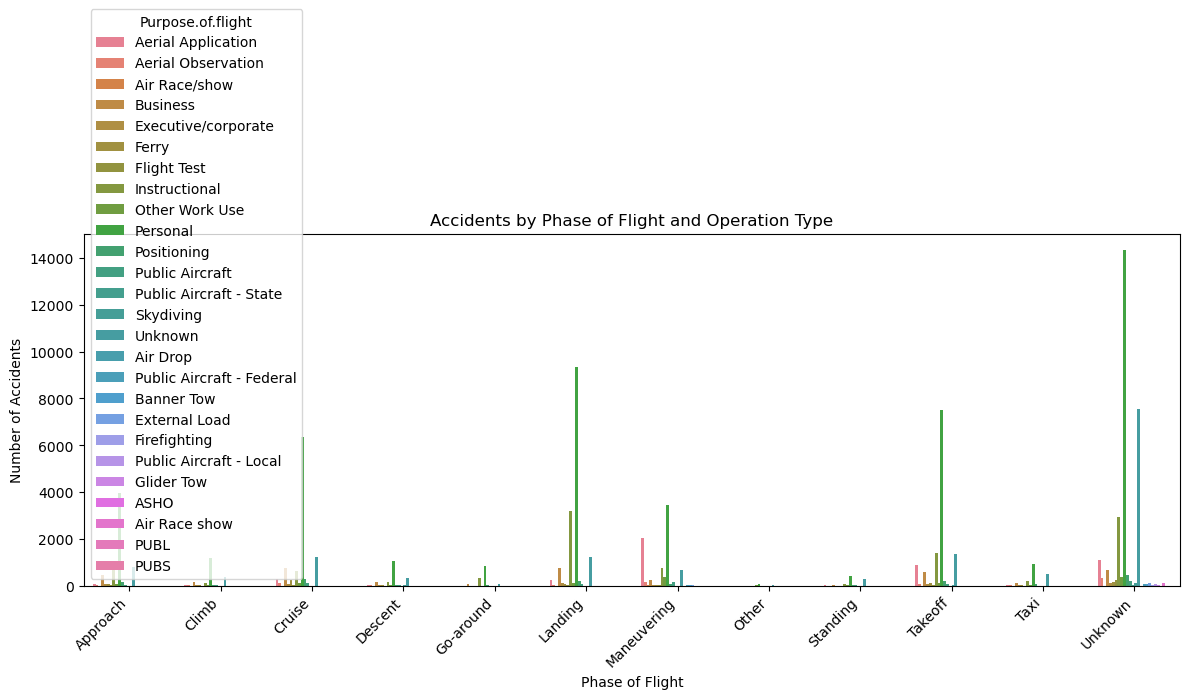

Takeaway: Most accidents happen during 'Unknown' in operation type 'Personal'.


In [ ]:
# 11. Visual 2: Accidents by phase of flight and operation type (beginner-friendly)

# Group by phase of flight and operation type
if set(['Broad.phase.of.flight', 'Purpose.of.flight']).issubset(df.columns):
    phase_op = df.groupby(['Broad.phase.of.flight','Purpose.of.flight']).size().reset_index(name='accidents')

    # Simple bar plot
    plt.figure(figsize=(12,6))
    sns.barplot(data=phase_op, x='Broad.phase.of.flight', y='accidents', hue='Purpose.of.flight')
    plt.xticks(rotation=45, ha='right')
    plt.title('Accidents by Phase of Flight and Operation Type')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Accidents')
    plt.tight_layout()
    plt.show()

    # Quick takeaway: find the max row
    max_row = phase_op.loc[phase_op['accidents'].idxmax()]
    print(f"Takeaway: Most accidents happen during '{max_row['Broad.phase.of.flight']}' in operation type '{max_row['Purpose.of.flight']}'.")
else:
    print("The required columns ('Broad.phase.of.flight' and 'Purpose.of.flight') are not in the dataset.")


### 12. Visual 3: Accidents per year with severity overlay  

Here we want to check how accident counts and fatalities have changed over time.  
- First, we extract the year from each event date.  
- Next, we count how many accidents happened per year and sum up total fatalities.  
- Then, we plot both trends on the same chart:  
  - **Line 1 (blue):** total accidents per year.  
  - **Line 2 (orange, dashed):** total fatalities per year.  

This visualization helps us see if accidents are becoming more or less frequent, and whether severity (fatalities) is following the same direction.  

👉 **Key takeaway:** If the number of accidents is increasing while fatalities remain steady or lower, safety improvements may be working. But if both are rising, it signals higher overall risk that operators and regulators should address.  


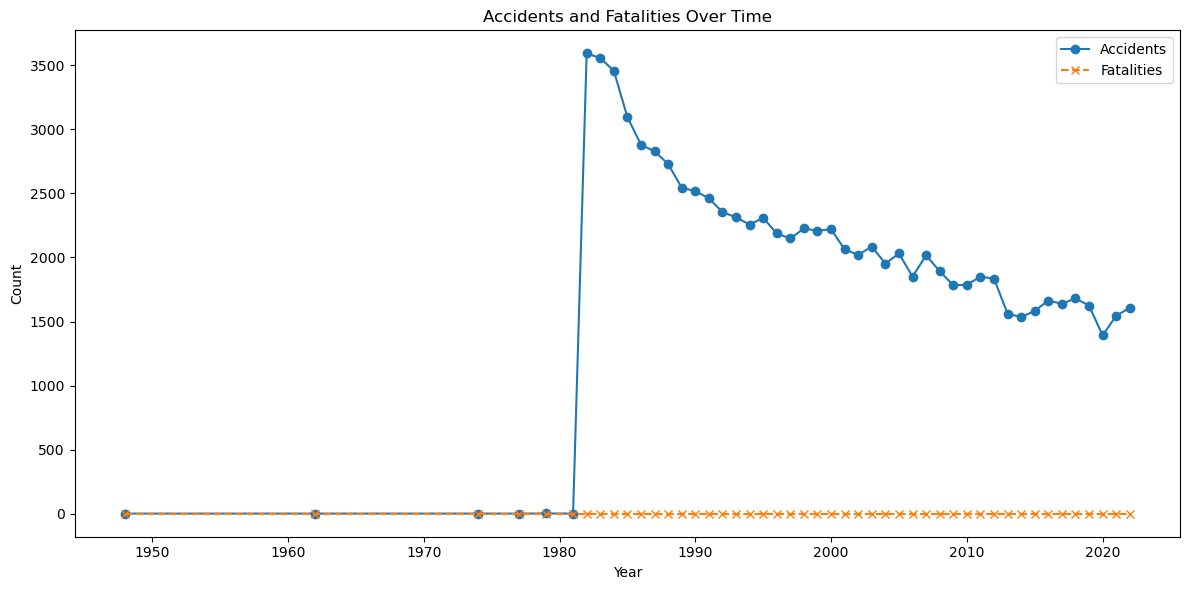

In [20]:

# Make sure Event.Date is treated as a datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract the year
df['Year'] = df['Event.Date'].dt.year

# Group by year and count accidents + fatalities
yearly = df.groupby('Year').agg(
    accidents=('Event.Id', 'count'),
    fatalities=('fatalities', 'sum')
).reset_index()

# Plot accidents and fatalities over time
plt.figure(figsize=(12,6))
plt.plot(yearly['Year'], yearly['accidents'], marker='o', label='Accidents')
plt.plot(yearly['Year'], yearly['fatalities'], marker='x', linestyle='--', label='Fatalities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Accidents and Fatalities Over Time')
plt.legend()
plt.tight_layout()
plt.show()
